In [120]:
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import pandas as pd
import seaborn as sns

In [121]:
process_teslamodel3 = True
process_teslamodely = True
process_polestar2 = True
process_ioniq5 = True
process_mache = True
process_ev6 = True

process_taycan = False


In [122]:
car_paths = []
all_cars = []

In [123]:
def read_files_to_df(path):
    base_path = '/users/markusk/git/nettiauto/data'
    all_files = glob.glob(os.path.join(base_path, path , '*.csv'))
    
    raw_df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
    raw_df = raw_df.drop(raw_df[raw_df.car_price == 0].index)
    
    return raw_df

In [124]:
def aggregate_dataframe(df):
    agg_df = df.groupby(['car_manufacturer', 'car_model', 'timestamp'], as_index=False).agg(
                min_price = ('car_price', 'min'),
                max_price = ('car_price', 'max'),
                mean_price = ('car_price', 'mean'),
                median_price = ('car_price', 'median'),
                count = ('car_price', 'count'))

    agg_df['time'] = agg_df['timestamp'].str[:10]
    agg_df = agg_df.drop(columns=['timestamp'])

    return agg_df

In [125]:
def plot_car(plot_df):
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()

    ax1.plot(plot_df['time'], plot_df['min_price'], '-g')
    ax1.plot(plot_df['time'], plot_df['max_price'], '-r')
    ax1.plot(plot_df['time'], plot_df['mean_price'], '-b')
    ax1.plot(plot_df['time'], plot_df['median_price'], '-c')

    ax2.plot(plot_df['time'], plot_df['count'], '.k')

    plt.title(f"{plot_df['car_manufacturer'].iloc[0]} {plot_df['car_model'].iloc[0]}")

    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price')
    ax2.set_ylabel('No of cars')

    for tick in ax1.get_xticklabels():
        tick.set_rotation(45)

    plt.show()

In [126]:
def process_car(path):
    car_df = read_files_to_df(path)
    car_df = aggregate_dataframe(car_df)
    
    plot_car(car_df)
    
    all_cars.append(car_df)

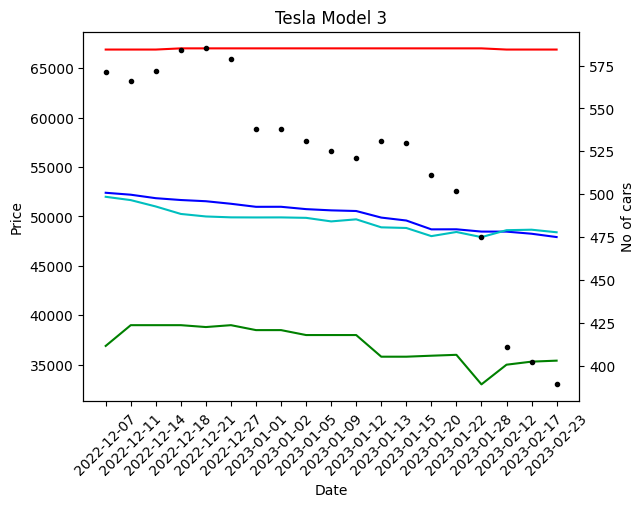

In [127]:

if process_teslamodel3:
    tm3_path = 'tesla/model3'
    process_car(tm3_path)
    

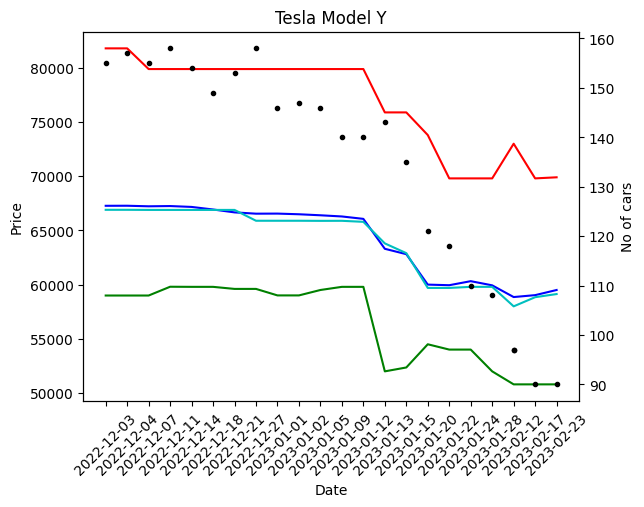

In [128]:

if process_teslamodely:
    tmy_path = 'tesla/modely'
    process_car(tmy_path)
      

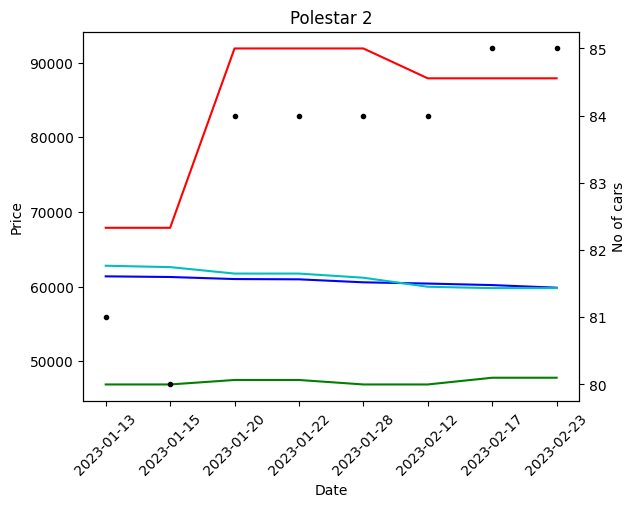

In [129]:

if process_polestar2:
    ps2_path = 'polestar/2'
    process_car(ps2_path)
    

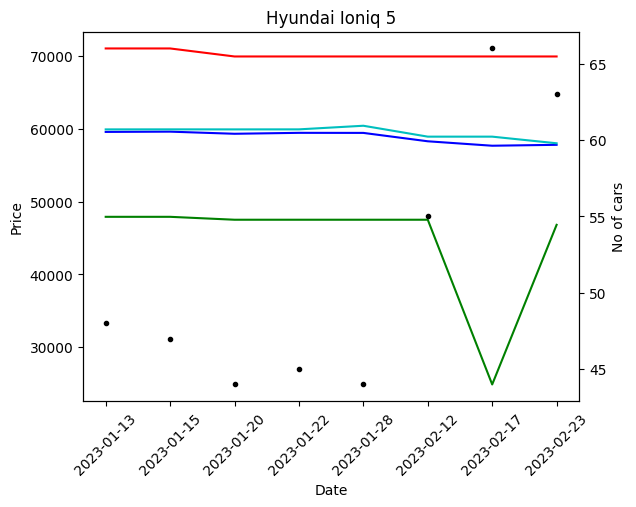

In [130]:

if process_ioniq5:
    hi5_path = 'hyundai/ioniq5'
    process_car(hi5_path)
    

In [131]:

if process_taycan:
    tay_path = 'porsche/taycan'
    process_car(tay_path)


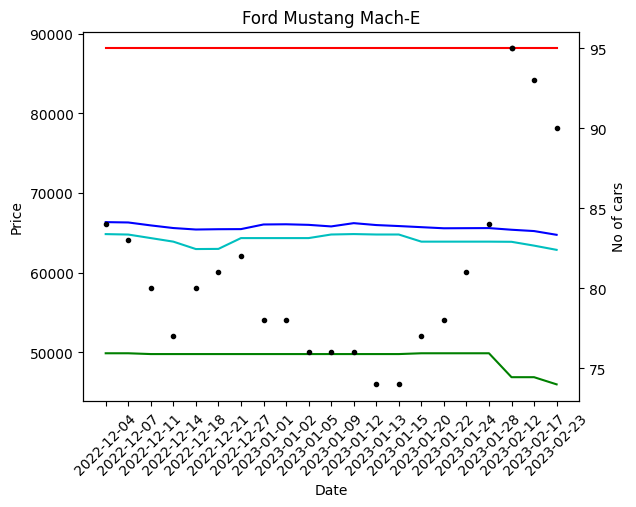

In [132]:

if process_mache:
    fme_path = 'ford/mache'
    process_car(fme_path)
    

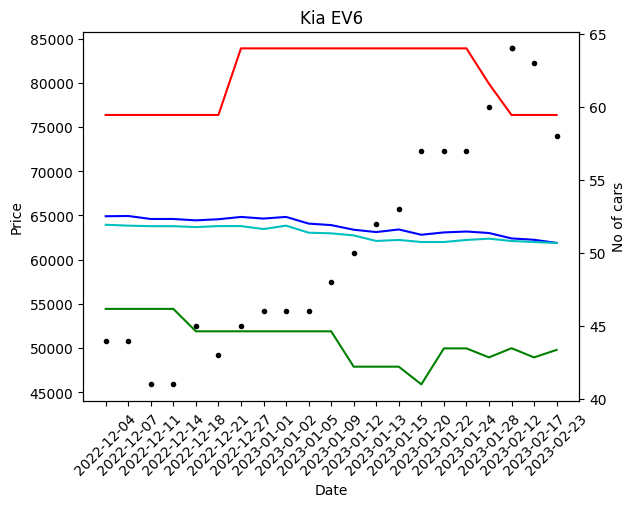

In [133]:

if process_ev6:
    ev6_path = 'kia/ev6'
    process_car(ev6_path)
    

In [134]:
### PLOT ALL CARS BEGINS HERE ###

In [135]:
all_cars_df = pd.concat(all_cars)

In [136]:
all_cars_df['car'] = all_cars_df_raw['car_manufacturer'] + ' ' + all_cars_df['car_model'].astype(str)
all_cars_df = all_cars_df.sort_values('time')


In [137]:
#all_cars_df.info()
#display(all_cars_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 21
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_manufacturer  102 non-null    object 
 1   car_model         102 non-null    object 
 2   min_price         102 non-null    int64  
 3   max_price         102 non-null    int64  
 4   mean_price        102 non-null    float64
 5   median_price      102 non-null    float64
 6   count             102 non-null    int64  
 7   time              102 non-null    object 
 8   car               102 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 8.0+ KB


,car_manufacturer,car_model,min_price,max_price,mean_price,median_price,count,time,car
0,Tesla,Model Y,58990,81800,67270.322581,66900.0,155,2022-12-03,Tesla Model Y
0,Ford,Mustang Mach-E,49900,88140,66348.928571,64845.0,84,2022-12-04,Ford Mustang Mach-E
0,Kia,EV6,54436,76368,64915.386364,63950.0,44,2022-12-04,Kia EV6
1,Tesla,Model Y,58990,81800,67275.796178,66900.0,157,2022-12-04,Tesla Model Y
1,Kia,EV6,54436,76368,64941.750000,63850.0,44,2022-12-07,Kia EV6
...,...,...,...,...,...,...,...,...,...
22,Tesla,Model Y,50790,69900,59499.877778,59125.0,90,2023-02-23,Tesla Model Y
7,Polestar,2,47800,87900,59858.941176,59800.0,85,2023-02-23,Polestar 2
21,Ford,Mustang Mach-E,46000,88140,64755.988889,62870.0,90,2023-02-23,Ford Mustang Mach-E
7,Hyundai,Ioniq 5,46800,69900,57778.714286,57990.0,63,2023-02-23,Hyundai Ioniq 5


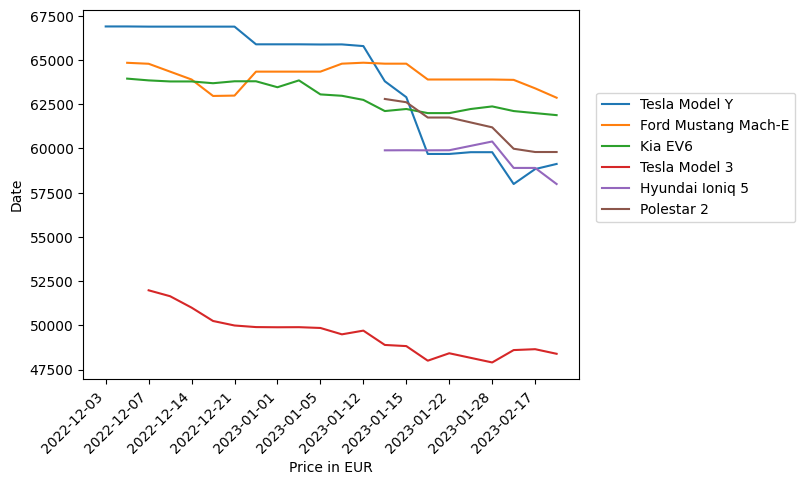

In [140]:
fig, ax = plt.subplots()

sns.lineplot(x='time', y='median_price', hue='car', data=all_cars_df)

ax.set_xlabel('Price in EUR')
ax.set_ylabel('Date')

plt.legend(bbox_to_anchor = (1.45, 0.6), loc='center right') # set legend right of plot
ax.set_xticks(ax.get_xticks()[::2]) # show every Nth tick
plt.xticks(rotation=45, ha='right') # rotate x axis labels so dates don't overlap

plt.show()